# LSTM Multiserie e Multivariada

## Dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler

In [29]:
trip = pd.read_csv("./data/ieee/TripA01.csv", sep=";", encoding='unicode_escape')
trip.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5


In [30]:
trip.columns

Index(['Time [s]', 'Velocity [km/h]', 'Elevation [m]', 'Throttle [%]',
       'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]',
       'Regenerative Braking Signal ', 'Battery Voltage [V]',
       'Battery Current [A]', 'Battery Temperature [°C]',
       'max. Battery Temperature [°C]', 'SoC [%]', 'displayed SoC [%]',
       'min. SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]',
       'Heating Power LIN [W]', 'Requested Heating Power [W]',
       'AirCon Power [kW]', 'Heater Signal', 'Heater Voltage [V]',
       'Heater Current [A]', 'Ambient Temperature [°C]',
       'Coolant Temperature Heatercore [°C]',
       'Requested Coolant Temperature [°C]', 'Coolant Temperature Inlet [°C]',
       'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]'],
      dtype='object')

In [31]:
trip.describe()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
count,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,10090.000000,...,10090.000000,10090.0,10090.0,10090.0,10090.000000,10090.0,10090.0,10090.0,10090.000000,10090.000000
mean,504.450000,26.502170,566.791625,26.470424,8.106545,0.014246,0.118162,388.483996,-11.953476,21.940141,...,1.610408,1.0,0.0,0.0,30.769972,0.0,0.0,0.0,8.589470,23.907057
std,291.287644,15.497032,5.577563,16.370510,42.123984,0.741669,0.322172,2.158318,22.799614,0.237147,...,0.340490,0.0,0.0,0.0,1.619032,0.0,0.0,0.0,7.124407,1.249755
min,0.000000,0.000000,558.000000,0.000000,-87.050000,-2.290000,0.000000,380.420000,-100.700000,21.000000,...,0.400000,1.0,0.0,0.0,25.500000,0.0,0.0,0.0,5.000000,22.170000
25%,252.225000,15.362500,562.090000,13.550000,-9.157500,-0.330000,0.000000,387.190000,-22.197500,22.000000,...,1.580000,1.0,0.0,0.0,30.500000,0.0,0.0,0.0,5.000000,22.670000
50%,504.450000,29.550000,565.000000,31.100000,4.630000,0.020000,0.000000,388.540000,-8.570000,22.000000,...,1.670000,1.0,0.0,0.0,31.000000,0.0,0.0,0.0,5.000000,24.000000
75%,756.675000,38.720000,574.000000,40.357500,23.540000,0.350000,0.000000,390.000000,-1.990000,22.000000,...,1.760000,1.0,0.0,0.0,32.000000,0.0,0.0,0.0,7.000000,25.010000
max,1008.900000,53.300000,574.000000,55.900000,174.420000,2.790000,1.000000,394.470000,66.220000,22.000000,...,2.520000,1.0,0.0,0.0,33.500000,0.0,0.0,0.0,30.500000,25.840000


In [32]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Time [s]                             10090 non-null  float64
 1   Velocity [km/h]                      10090 non-null  float64
 2   Elevation [m]                        10090 non-null  float64
 3   Throttle [%]                         10090 non-null  float64
 4   Motor Torque [Nm]                    10090 non-null  float64
 5   Longitudinal Acceleration [m/s^2]    10090 non-null  float64
 6   Regenerative Braking Signal          10090 non-null  float64
 7   Battery Voltage [V]                  10090 non-null  float64
 8   Battery Current [A]                  10090 non-null  float64
 9   Battery Temperature [°C]             10090 non-null  float64
 10  max. Battery Temperature [°C]        10090 non-null  float64
 11  SoC [%]                     

In [33]:
trip = trip.sort_values("Time [s]")
trip.head()

,Time [s],Velocity [km/h],Elevation [m],Throttle [%],Motor Torque [Nm],Longitudinal Acceleration [m/s^2],Regenerative Braking Signal,Battery Voltage [V],Battery Current [A],Battery Temperature [°C],...,AirCon Power [kW],Heater Signal,Heater Voltage [V],Heater Current [A],Ambient Temperature [°C],Coolant Temperature Heatercore [°C],Requested Coolant Temperature [°C],Coolant Temperature Inlet [°C],Heat Exchanger Temperature [°C],Cabin Temperature Sensor [°C]
0,0.0,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.20,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
1,0.1,0.0,574.0,0.0,0.0,0.00,0.0,391.4,-2.21,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
2,0.2,0.0,574.0,0.0,0.0,-0.01,0.0,391.4,-2.26,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
3,0.3,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5
4,0.4,0.0,574.0,0.0,0.0,-0.03,0.0,391.4,-2.30,21.0,...,0.4,1,0,0,25.5,0,0,0,30.5,24.5


## Preprocessamento

In [34]:
X = trip.drop(columns=['Time [s]', 'Motor Torque [Nm]']).values
y = trip['Motor Torque [Nm]'].values

In [35]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

## Janelamento e Treinamento do Modelo

In [37]:
def LSTM_model(data, labels, window_size=10, train_size=0.8, epochs=10):
    # Janelando os dados
    X_seq, y_seq = [], []
    
    for i in range(window_size, len(data)):
        X_seq.append(data[i-window_size:i, :])
        y_seq.append(labels[i])
        
    X_seq, y_seq = np.array(X_seq), np.array(y_seq)

    
    # Divisão de treino e teste com 80% para treino e 20% para teste
    train_size = int(len(X_seq) * train_size)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]


    # Criando e treinando o modelo
    model = Sequential(
        [
            LSTM(32, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
            Dense(32, activation='relu'), 
            Dense(1) 
        ]
    )

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16)


    # Imprimindo a avaliação
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid()

    loss, mae = model.evaluate(X_test, y_test)
    print(f"MAE: {mae:.8f}, Loss: {loss:.8f}")

    return model

Epoch 1/20


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1272.9980 - mae: 23.7016 - val_loss: 435.3894 - val_mae: 15.6325
Epoch 2/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 142.4910 - mae: 8.1901 - val_loss: 181.7064 - val_mae: 11.7323
Epoch 3/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 58.5152 - mae: 5.2959 - val_loss: 250.6034 - val_mae: 13.1038
Epoch 4/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 42.5409 - mae: 4.5406 - val_loss: 96.5101 - val_mae: 7.9157
Epoch 5/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 34.0604 - mae: 4.0633 - val_loss: 104.4665 - val_mae: 8.0128
Epoch 6/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 27.6622 - mae: 3.5745 - val_loss: 105.7803 - val_mae: 8.5106
Epoch 7/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 26.0682 - mae: 3.5354 - val_loss: 72.0297 - val_mae: 6.9678
Epoch 8/20
504/504 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 23.1922 - mae: 3.3229 - val_loss: 189.2829 - val_mae: 10.1411
Epoch 9/20
504/504 ━━━━

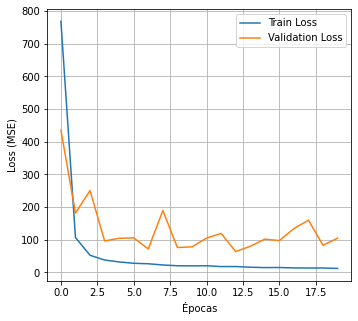

In [38]:
model = LSTM_model(X_scaled, y, window_size=10, train_size=0.8, epochs=20)

## Treinamento e Avaliação do Modelo com N series

### Preparação do Dataset

In [48]:
import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [49]:
directory = "./data/ieee/"
files = os.listdir(directory)
files.sort()

trips = []
for file in files:
    trip = pd.read_csv(directory + file, sep=";", encoding='unicode_escape')
    trip = trip.sort_values(by='Time [s]')
    trip['Trip'] = file.split(".")[0]
    trips.append(trip)

columns = []
for trip in trips:
    if 'Velocity [km/h]]]' in trip.columns:
        trip = trip.rename(columns={'Velocity [km/h]]]': 'Velocity [km/h]'})
        print(trip['Trip'].unique())
    columns.append(trip.columns.tolist())

grupo_colunas_unicos = [list(x) for x in set(tuple(lst) for lst in columns)]
grupo_colunas_unicos

['TripB38']


[['Time [s]',
  'Velocity [km/h]',
  'Elevation [m]',
  'Throttle [%]',
  'Motor Torque [Nm]',
  'Longitudinal Acceleration [m/s^2]',
  'Regenerative Braking Signal ',
  'Battery Voltage [V]',
  'Battery Current [A]',
  'Battery Temperature [°C]',
  'max. Battery Temperature [°C]',
  'SoC [%]',
  'displayed SoC [%]',
  'min. SoC [%]',
  'max. SoC [%)',
  'Heating Power CAN [kW]',
  'Requested Heating Power [W]',
  'AirCon Power [kW]',
  'Heater Signal',
  'Ambient Temperature [°C]',
  'Requested Coolant Temperature [°C]',
  'Heat Exchanger Temperature [°C]',
  'Cabin Temperature Sensor [°C]',
  'Trip'],
 ['Time [s]',
  'Velocity [km/h]',
  'Elevation [m]',
  'Throttle [%]',
  'Motor Torque [Nm]',
  'Longitudinal Acceleration [m/s^2]',
  'Regenerative Braking Signal ',
  'Battery Voltage [V]',
  'Battery Current [A]',
  'Battery Temperature [°C]',
  'max. Battery Temperature [°C]',
  'SoC [%]',
  'displayed SoC [%]',
  'min. SoC [%]',
  'max. SoC [%)',
  'Heating Power CAN [kW]',
  'Req

In [50]:
total_columns = grupo_colunas_unicos[0]

for group in grupo_colunas_unicos:
    for column in group:
        if column not in total_columns:
            total_columns.append(column)

print(len(total_columns))
total_columns.sort()
total_columns

50


['AirCon Power [kW]',
 'Ambient Temperature Sensor [°C]',
 'Ambient Temperature [°C]',
 'Battery Current [A]',
 'Battery Temperature [°C]',
 'Battery Voltage [V]',
 'Cabin Temperature Sensor [°C]',
 'Coolant Temperature Heatercore [°C]',
 'Coolant Temperature Inlet [°C]',
 'Coolant Volume Flow +500 [l/h]',
 'Elevation [m]',
 'Heat Exchanger Temperature [°C]',
 'Heater Current [A]',
 'Heater Signal',
 'Heater Voltage [V]',
 'Heating Power CAN [kW]',
 'Heating Power LIN [W]',
 'Longitudinal Acceleration [m/s^2]',
 'Motor Torque [Nm]',
 'Regenerative Braking Signal ',
 'Requested Coolant Temperature [°C]',
 'Requested Heating Power [W]',
 'SoC [%]',
 'Temperature Coolant Heater Inlet [°C]',
 'Temperature Coolant Heater Outlet [°C]',
 'Temperature Defrost central [°C]',
 'Temperature Defrost central left [°C]',
 'Temperature Defrost central right [°C]',
 'Temperature Defrost lateral left [°C]',
 'Temperature Defrost lateral right [°C]',
 'Temperature Feetvent Co-Driver [°C]',
 'Temperature

In [51]:
colunas_comuns = set(grupo_colunas_unicos[0])

for item in grupo_colunas_unicos[1:]:
    colunas_comuns.intersection_update(item)

colunas_comuns = list(colunas_comuns)
colunas_comuns.sort()
colunas_comuns

['AirCon Power [kW]',
 'Ambient Temperature [°C]',
 'Battery Current [A]',
 'Battery Temperature [°C]',
 'Battery Voltage [V]',
 'Cabin Temperature Sensor [°C]',
 'Elevation [m]',
 'Heat Exchanger Temperature [°C]',
 'Heater Signal',
 'Heating Power CAN [kW]',
 'Longitudinal Acceleration [m/s^2]',
 'Motor Torque [Nm]',
 'Regenerative Braking Signal ',
 'Requested Heating Power [W]',
 'SoC [%]',
 'Throttle [%]',
 'Time [s]',
 'Trip',
 'Velocity [km/h]',
 'displayed SoC [%]',
 'max. Battery Temperature [°C]',
 'max. SoC [%)',
 'min. SoC [%]']

In [52]:
colunas_remover = [
    'Battery Current [A]',
    'Battery Temperature [°C]',
    'Battery Voltage [V]',
    'Regenerative Braking Signal ',
    'SoC [%]',
    'displayed SoC [%]',
    'max. Battery Temperature [°C]',
    'max. SoC [%)',
    'min. SoC [%]'
]

colunas_final = [item for item in colunas_comuns if item not in colunas_remover]
colunas_final.sort()
colunas_final

['AirCon Power [kW]',
 'Ambient Temperature [°C]',
 'Cabin Temperature Sensor [°C]',
 'Elevation [m]',
 'Heat Exchanger Temperature [°C]',
 'Heater Signal',
 'Heating Power CAN [kW]',
 'Longitudinal Acceleration [m/s^2]',
 'Motor Torque [Nm]',
 'Requested Heating Power [W]',
 'Throttle [%]',
 'Time [s]',
 'Trip',
 'Velocity [km/h]']

In [53]:
trips = pd.concat(trips)
trips = trips[colunas_final]
trips.shape

(1094793, 14)

In [54]:
trips['Trip'].unique()

array(['TripA01', 'TripA02', 'TripA03', 'TripA04', 'TripA05', 'TripA06',
       'TripA07', 'TripA08', 'TripA09', 'TripA10', 'TripA11', 'TripA12',
       'TripA13', 'TripA14', 'TripA15', 'TripA16', 'TripA17', 'TripA18',
       'TripA19', 'TripA20', 'TripA21', 'TripA22', 'TripA23', 'TripA24',
       'TripA25', 'TripA26', 'TripA27', 'TripA28', 'TripA29', 'TripA30',
       'TripA31', 'TripA32', 'TripB01', 'TripB02', 'TripB03', 'TripB04',
       'TripB05', 'TripB06', 'TripB07', 'TripB08', 'TripB09', 'TripB10',
       'TripB11', 'TripB12', 'TripB13', 'TripB14', 'TripB15', 'TripB16',
       'TripB17', 'TripB18', 'TripB19', 'TripB20', 'TripB21', 'TripB22',
       'TripB23', 'TripB24', 'TripB25', 'TripB26', 'TripB27', 'TripB28',
       'TripB29', 'TripB30', 'TripB31', 'TripB32', 'TripB33', 'TripB34',
       'TripB35', 'TripB36', 'TripB37', 'TripB38'], dtype=object)

In [56]:
X = trips.drop(columns=['Time [s]', 'Motor Torque [Nm]', 'Trip'])
y = trips['Motor Torque [Nm]'].values

In [57]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X.values)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [58]:
X_scaled = pd.DataFrame(
    X_scaled,
    columns=X.columns,
    index=X.index
)
X_scaled['Trip'] = trips['Trip']
X_scaled.head()

,AirCon Power [kW],Ambient Temperature [°C],Cabin Temperature Sensor [°C],Elevation [m],Heat Exchanger Temperature [°C],Heater Signal,Heating Power CAN [kW],Longitudinal Acceleration [m/s^2],Requested Heating Power [W],Throttle [%],Velocity [km/h],Trip
0,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.667161,0.002206,0.0,0.0,TripA01
1,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.669385,0.002206,0.0,0.0,TripA01
2,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.668643,0.002206,0.0,0.0,TripA01
3,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.667161,0.002206,0.0,0.0,TripA01
4,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.667161,0.002206,0.0,0.0,TripA01


In [59]:
scaled_dataset = X_scaled
scaled_dataset['Motor Torque [Nm]'] = y_scaled
scaled_dataset.head()

,AirCon Power [kW],Ambient Temperature [°C],Cabin Temperature Sensor [°C],Elevation [m],Heat Exchanger Temperature [°C],Heater Signal,Heating Power CAN [kW],Longitudinal Acceleration [m/s^2],Requested Heating Power [W],Throttle [%],Velocity [km/h],Trip,Motor Torque [Nm]
0,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.667161,0.002206,0.0,0.0,TripA01,0.260522
1,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.669385,0.002206,0.0,0.0,TripA01,0.260522
2,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.668643,0.002206,0.0,0.0,TripA01,0.260522
3,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.667161,0.002206,0.0,0.0,TripA01,0.260522
4,0.163324,0.783784,0.485904,0.600904,0.424646,1.0,0.0,0.667161,0.002206,0.0,0.0,TripA01,0.260522


In [60]:
def time_series_train_test_split(dataset, train_size=0.8):
    X_trains, X_tests, y_trains, y_tests = [], [], [], []
    
    for trip in dataset['Trip'].unique():
        data_slice = dataset[dataset['Trip'] == trip]
        size = int(len(data_slice) * train_size)
    
        X_trains.append(data_slice.iloc[:size, :-1])
        X_tests.append(data_slice.iloc[size:, :-1])
        
        y_trains.append(data_slice.iloc[:size, -1])
        y_tests.append(data_slice.iloc[size:, -1])
    
    return pd.concat(X_trains), pd.concat(X_tests), pd.concat(y_trains), pd.concat(y_tests)

X_train, X_test, y_train, y_test = time_series_train_test_split(scaled_dataset)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(875810, 12)
(218983, 12)
(875810,)
(218983,)


In [63]:
def create_seq(X, y, window_size=10):
    X_seq, y_seq = [], []
    
    for i in range(window_size, len(X)):
        data_slice = X.iloc[i-window_size:i, :]

        # Se tiver mais de uma trip na mesma janela, eu não adiciono no conjunto de dados
        if len(data_slice['Trip'].unique()) == 1:
            X_seq.append(data_slice.drop(columns=['Trip']).values)
            y_seq.append(y[i])
        
    return np.array(X_seq), np.array(y_seq)


X_train_seq, y_train_seq = create_seq(X_train, y_train.values, window_size=10)
X_test_seq, y_test_seq = create_seq(X_test, y_test.values, window_size=10)

In [69]:
# Não usar isso aqui para salvar pq está perdendo o shape
# Talvez se guardar o shape e usar um reshape depois

# X_train_seq.tofile('./X_train_seq.dat')
# y_train_seq.tofile('./y_train_seq.dat')
# X_test_seq.tofile('./X_test_seq.dat')
# y_test_seq.tofile('./y_test_seq.dat')

# X_train_seq = np.fromfile('./X_train_seq.dat')
# y_train_seq = np.fromfile('./y_train_seq.dat')
# X_test_seq = np.fromfile('./X_test_seq.dat')
# y_test_seq = np.fromfile('./y_test_seq.dat')

### Treinamento do LSTM

In [70]:
def LSTM_model(X_seq, y_seq, window_size=10, train_size=0.8, epochs=10):
    # Divisão de treino e validação com 80% para treino e 20% para validação
    train_size = int(len(X_seq) * train_size)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]


    # Criando e treinando o modelo
    model = Sequential(
        [
            LSTM(32, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
            Dense(32, activation='relu'), 
            Dense(1) 
        ]
    )

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=16)


    # Imprimindo a avaliação
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid()

    loss, mae = model.evaluate(X_test, y_test)
    print(f"MAE: {mae:.8f}, Loss: {loss:.8f}")

    return model

/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 49s 1ms/step - loss: 6.6986e-04 - mae: 0.0161 - val_loss: 0.0064 - val_mae: 0.0297
Epoch 2/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 1.5340e-04 - mae: 0.0082 - val_loss: 0.0057 - val_mae: 0.0236
Epoch 3/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - loss: 1.1697e-04 - mae: 0.0069 - val_loss: 0.0052 - val_mae: 0.0237
Epoch 4/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 54s 1ms/step - loss: 1.0164e-04 - mae: 0.0064 - val_loss: 0.0051 - val_mae: 0.0239
Epoch 5/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - loss: 9.2093e-05 - mae: 0.0061 - val_loss: 0.0047 - val_mae: 0.0224
Epoch 6/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 52s 1ms/step - loss: 8.4348e-05 - mae: 0.0058 - val_loss: 0.0044 - val_mae: 0.0224
Epoch 7/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - loss: 7.8664e-05 - mae: 0.0056 - val_loss: 0.0043 - val_mae: 0.0207
Epoch 8/20
43759/43759 ━━━━━━━━━━━━━━━━━━━━ 53s 1ms/step - loss: 7.4153e-05 - mae: 0.0054 - val_loss: 0.0040 - 

<Sequential name=sequential_2, built=True>

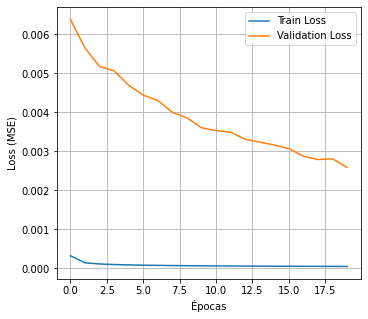

In [81]:
model = LSTM_model(X_train_seq, y_train_seq, window_size=10, train_size=0.8, epochs=20)
model

In [82]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 32)             │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,165 (78.77 KB)

 Trainable params: 6,721 (26.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,444 (52.52 KB)

### Avaliação 

In [83]:
def plot_error_histogram(y_pred, y_test):
    # Erro é o predito menos o real
    error = y_pred - y_test

    # Estatísticas do erro
    mean_error = np.mean(error)
    std_error = np.std(error)
    min_error = np.min(error)
    max_error = np.max(error)

    # Histograma
    plt.hist(error, bins=50, color='blue', alpha=0.7, edgecolor='black')

    # Linhas de referência
    plt.axvline(mean_error, color='red', linestyle='dashed', linewidth=2, label=f"Média: {mean_error:.4f}")
    plt.axvline(mean_error + 2*std_error, color='green', linestyle='dashed', linewidth=2, label=f'+2σ: {(mean_error + 2*std_error):.4f}')
    plt.axvline(mean_error - 2*std_error, color='green', linestyle='dashed', linewidth=2, label=f'-2σ: {(mean_error - 2*std_error):.4f}')
    plt.axvline(min_error, color='purple', linestyle='dashed', linewidth=2, label=f'Mínimo: {min_error:.4f}')
    plt.axvline(max_error, color='orange', linestyle='dashed', linewidth=2, label=f'Máximo: {max_error:.4f}')

    # Extras
    plt.xlabel("Erro (y_pred - y_real)")
    plt.ylabel("Frequência")
    plt.legend()
    plt.grid(True)

    plt.show()

6824/6824 ━━━━━━━━━━━━━━━━━━━━ 3s 491us/step


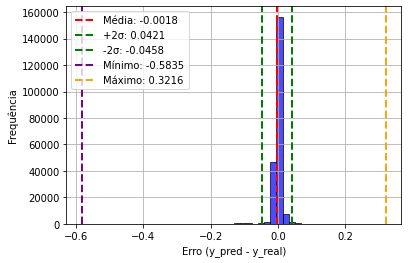

In [84]:
prediction = model.predict(X_test_seq)
y_pred_seq = prediction.reshape(1,-1)[0]

plot_error_histogram(y_pred_seq, y_test_seq)

(array([1.69160e+04, 9.83800e+03, 1.45340e+04, 2.03170e+04, 2.47150e+04,
        3.46540e+04, 5.96600e+04, 2.71729e+05, 2.36076e+05, 1.57940e+05,
        8.24450e+04, 4.99130e+04, 3.17360e+04, 2.14710e+04, 1.65480e+04,
        1.29050e+04, 9.42700e+03, 7.06400e+03, 5.20500e+03, 3.79100e+03,
        2.72600e+03, 1.80100e+03, 1.16600e+03, 9.03000e+02, 5.29000e+02,
        4.28000e+02, 1.71000e+02, 5.80000e+01, 3.80000e+01, 8.90000e+01]),
 array([-87.9       , -76.65333333, -65.40666667, -54.16      ,
        -42.91333333, -31.66666667, -20.42      ,  -9.17333333,
          2.07333333,  13.32      ,  24.56666667,  35.81333333,
         47.06      ,  58.30666667,  69.55333333,  80.8       ,
         92.04666667, 103.29333333, 114.54      , 125.78666667,
        137.03333333, 148.28      , 159.52666667, 170.77333333,
        182.02      , 193.26666667, 204.51333333, 215.76      ,
        227.00666667, 238.25333333, 249.5       ]),
 <BarContainer object of 30 artists>)

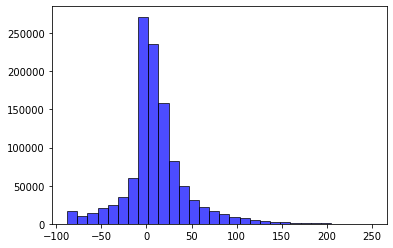

In [85]:
plt.hist(trips['Motor Torque [Nm]'], bins=30, color='blue', alpha=0.7, edgecolor='black')

## Modelo Torque e Throttle

### General Functions

In [2]:
!export TF_ENABLE_ONEDNN_OPTS=0

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from IPython.display import display


WINDOW_SIZE = 10

In [4]:
directory = "./data/ieee/"
files = os.listdir(directory)
files.sort()

trips = []
for file in files:
    trip = pd.read_csv(directory + file, sep=";", encoding='unicode_escape')
    trip = trip.sort_values(by='Time [s]')
    trip['Trip'] = file.split(".")[0]
    if 'Velocity [km/h]]]' in trip.columns:
        trip = trip.rename(columns={'Velocity [km/h]]]': 'Velocity [km/h]'})
    trips.append(trip)

# Mapa (elet - comb):
# 'Ambient Temperature [°C]': 'Veh_ambient_temp_ECM',
# 'Cabin Temperature Sensor [°C]': 'HVAC_pass_compartment_air_temp_filt_HVAC',
# 'Heat Exchanger Temperature [°C]': 'HVAC_heater_core_coolant_temp_sensor_HVAC',
# 'Longitudinal Acceleration [m/s^2]': 'ActVehAccel',
# 'Throttle [%]': 'Eng_throttle_pos_ECM',
# 'Velocity [km/h]': 'VehSpdAvgDrvn'
colunas_selecionadas = [
    'Ambient Temperature [°C]',
    'Cabin Temperature Sensor [°C]',
    'Heat Exchanger Temperature [°C]',
    'Longitudinal Acceleration [m/s^2]',
    'Throttle [%]',
    'Velocity [km/h]',
    'Motor Torque [Nm]',
    'Time [s]',
    'Trip'
]


trips = pd.concat(trips)
trips = trips[colunas_selecionadas]
trips.shape

(1094793, 9)

In [5]:
def normalize(data, label):
    # Estou deixando 'Time [s]' no X pq os intervalos de tempo não são regulares
    columns = ['Trip', 'Throttle [%]', 'Motor Torque [Nm]']
    
    X = data.drop(columns=columns)
    y = data[label].values
    
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_scaled = scaler_X.fit_transform(X.values)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
    
    X_scaled = pd.DataFrame(
        X_scaled,
        columns=X.columns,
        index=X.index
    )
    X_scaled['Trip'] = data['Trip']
    
    scaled_dataset = X_scaled
    scaled_dataset[label] = y_scaled

    return scaled_dataset, scaler_X, scaler_y

In [6]:
def time_series_train_test_split(dataset, label, train_size=0.8):
    X_trains, X_tests, y_trains, y_tests = [], [], [], []    
    
    for trip in dataset['Trip'].unique():
        data_slice = dataset[dataset['Trip'] == trip]
        size = int(len(data_slice) * train_size)
    
        X_trains.append(data_slice.drop(columns=[label]).iloc[:size, :])
        X_tests.append(data_slice.drop(columns=[label]).iloc[size:, :])
        
        y_trains.append(data_slice[label].iloc[:size])
        y_tests.append(data_slice[label].iloc[size:])
    
    return pd.concat(X_trains), pd.concat(X_tests), pd.concat(y_trains), pd.concat(y_tests)

In [7]:
def create_seq(X, y, window_size=10):
    X_seq, y_seq = [], []
    
    for i in range(window_size, len(X)):
        data_slice = X.iloc[i-window_size:i, :]

        # Se tiver mais de uma trip na mesma janela, eu não adiciono no conjunto de dados
        if len(data_slice['Trip'].unique()) == 1:
            X_seq.append(data_slice.drop(columns=['Trip']).values)
            y_seq.append(y[i])
        
    return np.array(X_seq), np.array(y_seq)

In [8]:
def LSTM_model(X_seq, y_seq, train_size=0.8, epochs=10, batch_size=16):
    # Divisão de treino e validação com 80% para treino e 20% para validação
    train_size = int(len(X_seq) * train_size)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]


    # Criando e treinando o modelo
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(32, activation='tanh'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)


    # Imprimindo a avaliação
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Épocas')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid()

    loss, mae = model.evaluate(X_test, y_test)
    print(f"MAE: {mae:.8f}, Loss: {loss:.8f}")

    return model

In [9]:
def plot_error_histogram(y_pred, y_test, bins=50, color='blue'):
    # Erro é o predito menos o real
    error = y_pred - y_test

    # Estatísticas do erro
    mean_error = np.mean(error)
    std_error = np.std(error)
    min_error = np.min(error)
    max_error = np.max(error)

    # Histograma
    plt.hist(error, bins=bins, color=color, alpha=0.7, edgecolor='black')

    # Linhas de referência
    plt.axvline(mean_error, color='red', linestyle='dashed', linewidth=2, label=f"Média: {mean_error:.4f}")
    plt.axvline(mean_error + 2*std_error, color='green', linestyle='dashed', linewidth=2, label=f'+2σ: {(mean_error + 2*std_error):.4f}')
    plt.axvline(mean_error - 2*std_error, color='green', linestyle='dashed', linewidth=2, label=f'-2σ: {(mean_error - 2*std_error):.4f}')
    plt.axvline(min_error, color='purple', linestyle='dashed', linewidth=2, label=f'Mínimo: {min_error:.4f}')
    plt.axvline(max_error, color='orange', linestyle='dashed', linewidth=2, label=f'Máximo: {max_error:.4f}')

    # Extras
    plt.xlabel("Erro (y_pred - y_real)")
    plt.ylabel("Frequência")
    plt.legend()
    plt.grid(True)

    plt.show()

### Torque

In [23]:
trips.head()

,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Throttle [%],Velocity [km/h],Motor Torque [Nm],Time [s],Trip
0,25.5,24.5,30.5,-0.03,0.0,0.0,0.0,0.0,TripA01
1,25.5,24.5,30.5,0.00,0.0,0.0,0.0,0.1,TripA01
2,25.5,24.5,30.5,-0.01,0.0,0.0,0.0,0.2,TripA01
3,25.5,24.5,30.5,-0.03,0.0,0.0,0.0,0.3,TripA01
4,25.5,24.5,30.5,-0.03,0.0,0.0,0.0,0.4,TripA01


In [11]:
torque_scaled_dataset, torque_X_scaler, torque_y_scaler = normalize(trips, 'Motor Torque [Nm]')
torque_scaled_dataset.head()

,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip,Motor Torque [Nm]
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01,0.260522
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01,0.260522
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01,0.260522
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01,0.260522
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01,0.260522


In [12]:
torque_X_train, torque_X_test, torque_y_train, torque_y_test = time_series_train_test_split(torque_scaled_dataset, 'Motor Torque [Nm]')
print(f"\ntorque_X_train: {torque_X_train.shape}")
display(torque_X_train.head())

print(f"\ntorque_X_test: {torque_X_test.shape}")
display(torque_X_test.head())

print(f"\ntorque_y_train: {torque_y_train.shape}")
display(torque_y_train.head())

print(f"\ntorque_y_test: {torque_y_test.shape}")
display(torque_y_test.head())


torque_X_train: (875810, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01



torque_X_test: (218983, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
8072,0.959459,0.413521,0.0,0.676798,0.001773,0.143883,TripA01
8073,0.959459,0.413521,0.0,0.633803,0.001314,0.143901,TripA01
8074,0.959459,0.413521,0.0,0.624166,0.001117,0.143919,TripA01
8075,0.959459,0.413521,0.0,0.643440,0.000854,0.143937,TripA01
8076,0.959459,0.413521,0.0,0.642698,0.000722,0.143955,TripA01



torque_y_train: (875810,)


0    0.260522
1    0.260522
2    0.260522
3    0.260522
4    0.260522
Name: Motor Torque [Nm], dtype: float64


torque_y_test: (218983,)


8072    0.236811
8073    0.246829
8074    0.260522
8075    0.260522
8076    0.260522
Name: Motor Torque [Nm], dtype: float64

In [13]:
torque_X_train_seq, torque_y_train_seq = create_seq(torque_X_train, torque_y_train.values, window_size=WINDOW_SIZE)
torque_X_test_seq, torque_y_test_seq = create_seq(torque_X_test, torque_y_test.values, window_size=WINDOW_SIZE)

print("TRAIN:")
print(f"torque_X_train_seq {torque_X_train_seq.shape}")
print(f"torque_y_train_seq {torque_y_train_seq.shape}")
print("\nTEST:")
print(f"torque_X_test_seq {torque_X_test_seq.shape}")
print(f"torque_y_test_seq {torque_y_test_seq.shape}")

TRAIN:
torque_X_train_seq (875179, 10, 6)
torque_y_train_seq (875179,)

TEST:
torque_X_test_seq (218352, 10, 6)
torque_y_test_seq (218352,)


I0000 00:00:1745860599.824556   74752 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6245 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Epoch 1/20


I0000 00:00:1745860601.202885   75484 cuda_dnn.cc:529] Loaded cuDNN version 90300


5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0033 - mae: 0.0303 - val_loss: 6.3121e-04 - val_mae: 0.0190
Epoch 2/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 4.3048e-04 - mae: 0.0139 - val_loss: 4.4229e-04 - val_mae: 0.0142
Epoch 3/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.8397e-04 - mae: 0.0130 - val_loss: 4.2307e-04 - val_mae: 0.0138
Epoch 4/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.6093e-04 - mae: 0.0126 - val_loss: 3.8290e-04 - val_mae: 0.0124
Epoch 5/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.4771e-04 - mae: 0.0124 - val_loss: 3.6460e-04 - val_mae: 0.0121
Epoch 6/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.3455e-04 - mae: 0.0121 - val_loss: 3.7968e-04 - val_mae: 0.0132
Epoch 7/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.2784e-04 - mae: 0.0120 - val_loss: 4.3061e-04 - val_mae: 0.0149
Epoch 8/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.2141e-04 - mae: 0.0119 - val_loss: 3.3649e-04 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,245 (71.27 KB)

 Trainable params: 6,081 (23.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,164 (47.52 KB)

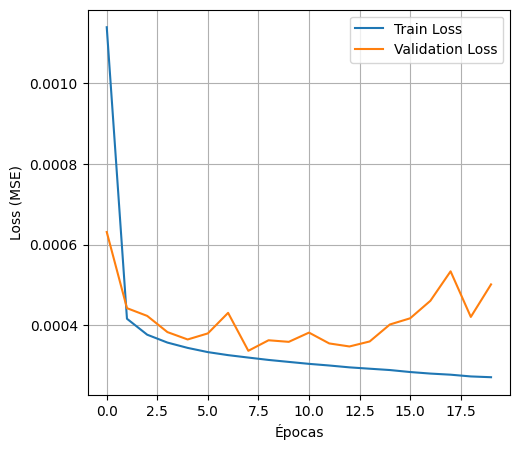

In [14]:
torque_model = LSTM_model(torque_X_train_seq, torque_y_train_seq, train_size=0.8, epochs=20, batch_size=128)
torque_model.summary()

6824/6824 ━━━━━━━━━━━━━━━━━━━━ 3s 507us/step


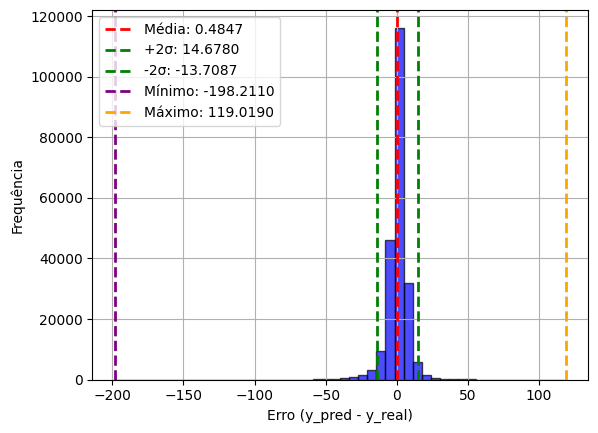

In [25]:
torque_y_pred_seq = torque_model.predict(torque_X_test_seq)
# y_pred_seq = prediction.reshape(1,-1)[0]

plot_error_histogram(
    torque_y_scaler.inverse_transform(torque_y_pred_seq), 
    torque_y_scaler.inverse_transform(torque_y_test_seq.reshape(len(torque_y_test_seq), 1)),
    bins=50
)

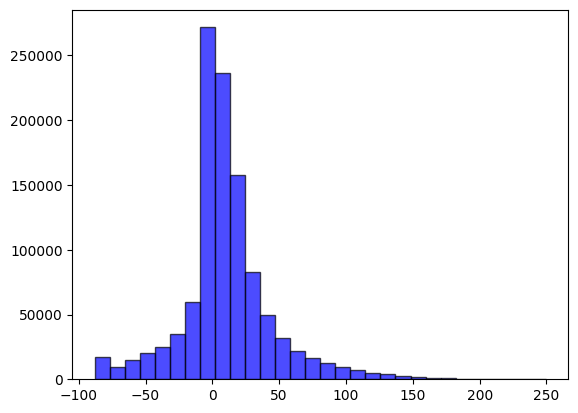

In [26]:
plt.hist(trips['Motor Torque [Nm]'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.show()

### Throttle

In [27]:
trips.head()

,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Throttle [%],Velocity [km/h],Motor Torque [Nm],Time [s],Trip
0,25.5,24.5,30.5,-0.03,0.0,0.0,0.0,0.0,TripA01
1,25.5,24.5,30.5,0.00,0.0,0.0,0.0,0.1,TripA01
2,25.5,24.5,30.5,-0.01,0.0,0.0,0.0,0.2,TripA01
3,25.5,24.5,30.5,-0.03,0.0,0.0,0.0,0.3,TripA01
4,25.5,24.5,30.5,-0.03,0.0,0.0,0.0,0.4,TripA01


In [28]:
throttle_scaled_dataset, throttle_X_scaler, throttle_y_scaler = normalize(trips, 'Throttle [%]')
throttle_scaled_dataset.head()

,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip,Throttle [%]
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01,0.0
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01,0.0
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01,0.0
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01,0.0
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01,0.0


In [29]:
throttle_X_train, throttle_X_test, throttle_y_train, throttle_y_test = time_series_train_test_split(throttle_scaled_dataset, 'Throttle [%]')
print(f"\nthrottle_X_train: {throttle_X_train.shape}")
display(throttle_X_train.head())

print(f"\nthrottle_X_test: {throttle_X_test.shape}")
display(throttle_X_test.head())

print(f"\nthrottle_y_train: {throttle_y_train.shape}")
display(throttle_y_train.head())

print(f"\nthrottle_y_test: {throttle_y_test.shape}")
display(throttle_y_test.head())


throttle_X_train: (875810, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01



throttle_X_test: (218983, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
8072,0.959459,0.413521,0.0,0.676798,0.001773,0.143883,TripA01
8073,0.959459,0.413521,0.0,0.633803,0.001314,0.143901,TripA01
8074,0.959459,0.413521,0.0,0.624166,0.001117,0.143919,TripA01
8075,0.959459,0.413521,0.0,0.643440,0.000854,0.143937,TripA01
8076,0.959459,0.413521,0.0,0.642698,0.000722,0.143955,TripA01



throttle_y_train: (875810,)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Throttle [%], dtype: float64


throttle_y_test: (218983,)


8072    0.0
8073    0.0
8074    0.0
8075    0.0
8076    0.0
Name: Throttle [%], dtype: float64

In [31]:
throttle_X_train_seq, throttle_y_train_seq = create_seq(throttle_X_train, throttle_y_train.values, window_size=WINDOW_SIZE)
throttle_X_test_seq, throttle_y_test_seq = create_seq(throttle_X_test, throttle_y_test.values, window_size=WINDOW_SIZE)

print("TRAIN:")
print(f"throttle_X_train_seq {throttle_X_train_seq.shape}")
print(f"throttle_y_train_seq {throttle_y_train_seq.shape}")
print("\nTEST:")
print(f"throttle_X_test_seq {throttle_X_test_seq.shape}")
print(f"throttle_y_test_seq {throttle_y_test_seq.shape}")

TRAIN:
throttle_X_train_seq (875179, 10, 6)
throttle_y_train_seq (875179,)

TEST:
throttle_X_test_seq (218352, 10, 6)
throttle_y_test_seq (218352,)


Epoch 1/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0058 - mae: 0.0531 - val_loss: 0.0113 - val_mae: 0.0636
Epoch 2/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0030 - mae: 0.0362 - val_loss: 0.0062 - val_mae: 0.0517
Epoch 3/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0026 - mae: 0.0330 - val_loss: 0.0053 - val_mae: 0.0461
Epoch 4/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0024 - mae: 0.0312 - val_loss: 0.0051 - val_mae: 0.0443
Epoch 5/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0021 - mae: 0.0295 - val_loss: 0.0063 - val_mae: 0.0473
Epoch 6/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0020 - mae: 0.0282 - val_loss: 0.0065 - val_mae: 0.0469
Epoch 7/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0019 - mae: 0.0272 - val_loss: 0.0081 - val_mae: 0.0495
Epoch 8/20
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0018 - mae: 0.0265 - val_loss: 0.0072 - val_mae: 0.0475
Epoch 9/20
5470/5470 ━━━━━━━━━━━

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 32)             │         4,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,245 (71.27 KB)

 Trainable params: 6,081 (23.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,164 (47.52 KB)

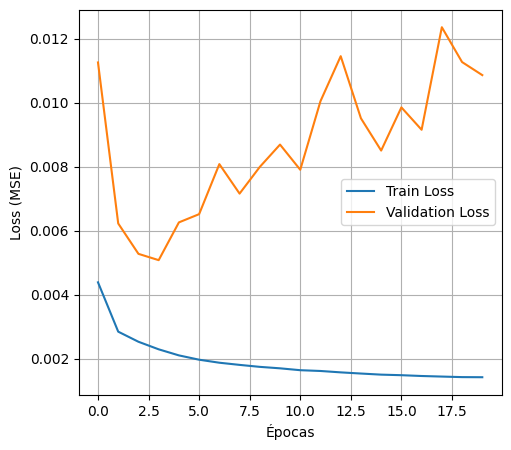

In [32]:
throttle_model = LSTM_model(throttle_X_train_seq, throttle_y_train_seq, train_size=0.8, epochs=20, batch_size=128)
throttle_model.summary()

6824/6824 ━━━━━━━━━━━━━━━━━━━━ 4s 523us/step


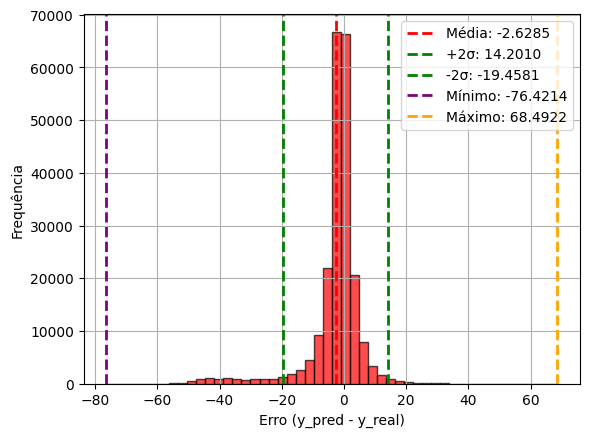

In [35]:
throttle_y_pred_seq = throttle_model.predict(throttle_X_test_seq)

plot_error_histogram(
    throttle_y_scaler.inverse_transform(throttle_y_pred_seq), 
    throttle_y_scaler.inverse_transform(throttle_y_test_seq.reshape(len(throttle_y_test_seq), 1)),
    bins=50,
    color='red'
)

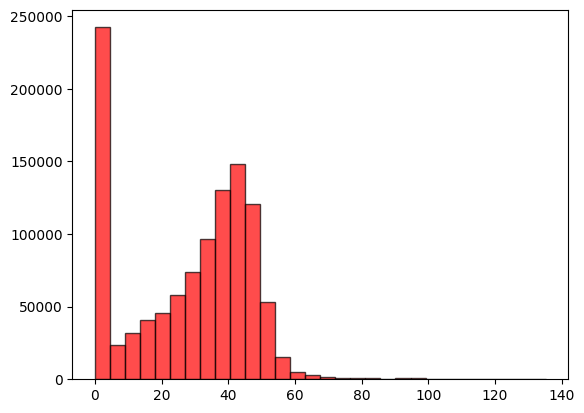

In [36]:
plt.hist(trips['Throttle [%]'], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.show()

### Timeline

In [37]:
# Esse é o X de teste da minha timeline que eu vou predizer em cima dele normalizado
# Já está filtrado somente pela jornada TripA01
timeline_X = torque_X_test[torque_X_test['Trip'] == 'TripA01']

# Esse é o y de teste da minha timeline desnormalizado
# Está filtrado pela jornada TripA01
# Eu filtrei nos dados originais e peguei os 20% finais para ser a parte de teste.
# Como é uma série temporal, eu garanto que serão os rótulos correspondentes ao X da linha anterior
total_trip_size = len(trips[trips['Trip'] == 'TripA01'])
train_size = int(total_trip_size*0.8)
timeline_y = trips[trips['Trip'] == 'TripA01'][train_size:]['Motor Torque [Nm]']

# Criando o janelamento do X e do y para rodar no LSTM
timeline_X_seq, timeline_y_seq = create_seq(timeline_X, timeline_y.values, window_size=WINDOW_SIZE)

# Realizando a predição com o modelo treinado e desnormalizando
timeline_y_pred_seq = torque_model.predict(timeline_X_seq)
timeline_y_pred_seq_desnorm = torque_y_scaler.inverse_transform(timeline_y_pred_seq)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step


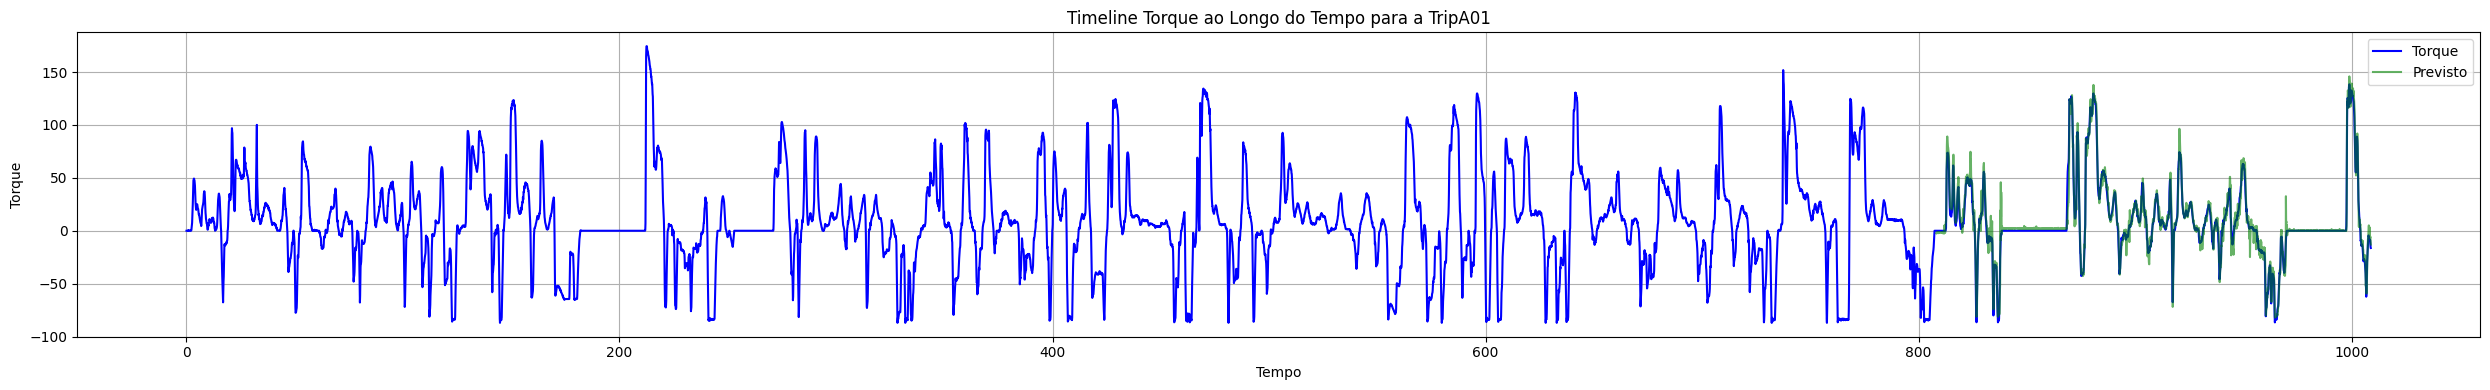

In [38]:
# Plotando a linha do tempo original da jornada TripA01 em azul
plt.figure(figsize=(25, 4))
plt.plot(
    trips[trips['Trip'] == 'TripA01']['Time [s]'], 
    trips[trips['Trip'] == 'TripA01']['Motor Torque [Nm]'], 
    label='Torque',
    color='blue'
)

# Plotando a linha predita pelo modelo em verde transparente no final da timeline anterior
plt.plot(
    # Para conseguir o tempo, eu preciso pegar o X usado em teste e desnormalizar.
    # Como a normalização do X foi feita com as 6 colunas, eu preciso usar as mesmas colunas e remover a coluna Trip
    # A janela tem um tamanho pré-defindo, por exemplo 10. Nesse caso, ele usa 10 valores para predizer o décimo primeiro e assim continua até o final do dataset.
    # Logo, os 10 primeiros valores não terãouma predição, então eu pego de WINDOW_SIZE até o final.
    # Eu tinha 5 colunas no X e só preciso do tempo aqui, então, eu pelo a coluna 5 que corresponde a sexta no intervalo de 0 a 5.
    torque_X_scaler.inverse_transform(timeline_X.drop(columns=['Trip'], axis=1)[WINDOW_SIZE:].values)[:, 5],
    timeline_y_pred_seq_desnorm,
    label='Previsto',
    color='green',
    alpha=0.6
)

plt.xlabel('Tempo')
plt.ylabel('Torque')
plt.title('Timeline Torque ao Longo do Tempo para a TripA01')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [39]:
throttle_timeline_X = throttle_X_test[throttle_X_test['Trip'] == 'TripA01']

total_trip_size = len(trips[trips['Trip'] == 'TripA01'])
train_size = int(total_trip_size*0.8)
throttle_timeline_y = trips[trips['Trip'] == 'TripA01'][train_size:]['Throttle [%]']

throttle_timeline_X_seq, throttle_timeline_y_seq = create_seq(throttle_timeline_X, throttle_timeline_y.values, window_size=WINDOW_SIZE)

throttle_timeline_y_pred_seq = throttle_model.predict(throttle_timeline_X_seq)
throttle_timeline_y_pred_seq_desnorm = throttle_y_scaler.inverse_transform(throttle_timeline_y_pred_seq)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


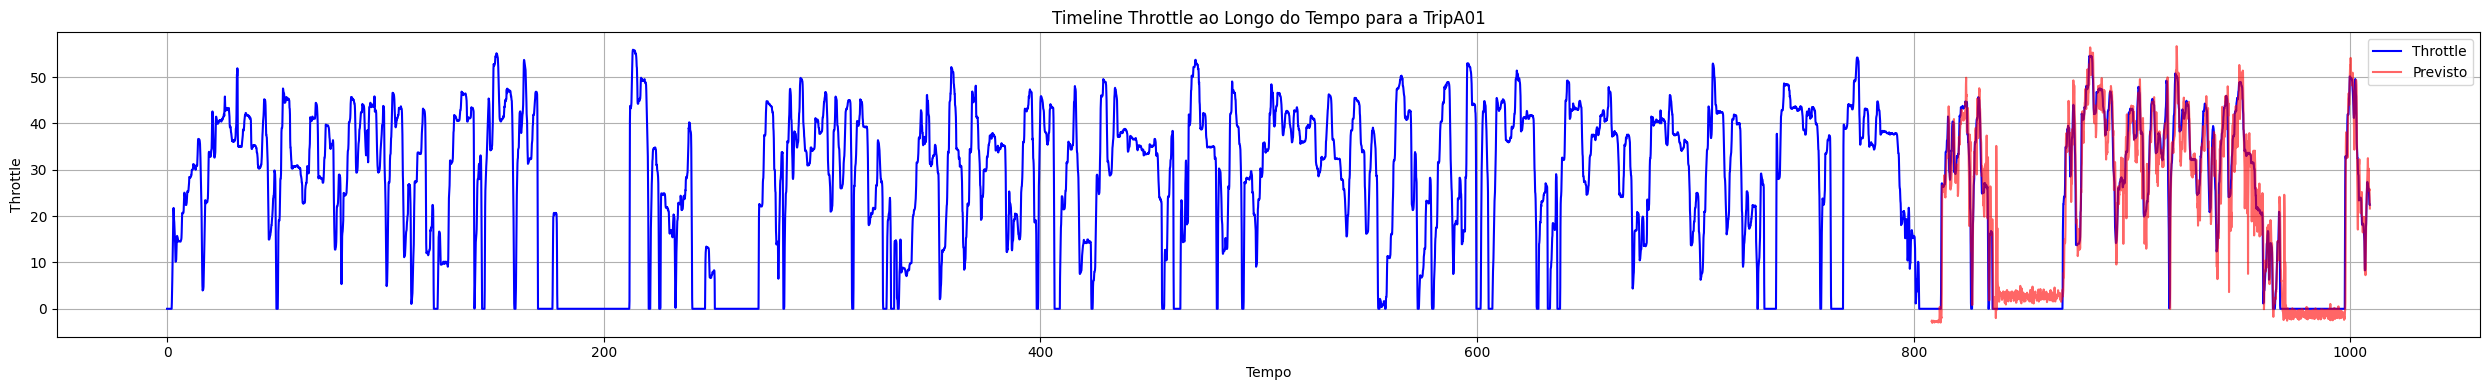

In [40]:
plt.figure(figsize=(25, 4))
plt.plot(
    trips[trips['Trip'] == 'TripA01']['Time [s]'], 
    trips[trips['Trip'] == 'TripA01']['Throttle [%]'], 
    label='Throttle',
    color='blue'
)

plt.plot(
    throttle_X_scaler.inverse_transform(throttle_timeline_X.drop(columns=['Trip'], axis=1)[WINDOW_SIZE:].values)[:, 5],
    throttle_timeline_y_pred_seq_desnorm,
    label='Previsto',
    color='red',
    alpha=0.6
)

plt.xlabel('Tempo')
plt.ylabel('Throttle')
plt.title('Timeline Throttle ao Longo do Tempo para a TripA01')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Optuna

### Definitions

In [2]:
!export TF_ENABLE_ONEDNN_OPTS=0

In [3]:
import optuna

import os
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from IPython.display import display


WINDOW_SIZE = 10
TRAIN_SIZE = 0.8
EPOCHS = 4
TRIALS = 5

2025-04-29 15:07:42.424420: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-29 15:07:42.432852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745950062.442296   60509 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745950062.445011   60509 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745950062.452430   60509 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [4]:
def read_database(directory):
    files = os.listdir(directory)
    files.sort()
    
    trips = []
    for file in files:
        trip = pd.read_csv(directory + file, sep=";", encoding='unicode_escape')
        trip = trip.sort_values(by='Time [s]')
        trip['Trip'] = file.split(".")[0]
        if 'Velocity [km/h]]]' in trip.columns:
            trip = trip.rename(columns={'Velocity [km/h]]]': 'Velocity [km/h]'})
        trips.append(trip)
    
    # Mapa (elet - comb):
    # 'Ambient Temperature [°C]': 'Veh_ambient_temp_ECM',
    # 'Cabin Temperature Sensor [°C]': 'HVAC_pass_compartment_air_temp_filt_HVAC',
    # 'Heat Exchanger Temperature [°C]': 'HVAC_heater_core_coolant_temp_sensor_HVAC',
    # 'Longitudinal Acceleration [m/s^2]': 'ActVehAccel',
    # 'Throttle [%]': 'Eng_throttle_pos_ECM',
    # 'Velocity [km/h]': 'VehSpdAvgDrvn'
    colunas_selecionadas = [
        'Ambient Temperature [°C]',
        'Cabin Temperature Sensor [°C]',
        'Heat Exchanger Temperature [°C]',
        'Longitudinal Acceleration [m/s^2]',
        'Throttle [%]',
        'Velocity [km/h]',
        'Motor Torque [Nm]',
        'Time [s]',
        'Trip'
    ]
    
    
    trips = pd.concat(trips)
    trips = trips[colunas_selecionadas]
    return trips

In [5]:
def normalize(data, label):
    # Estou deixando 'Time [s]' no X pq os intervalos de tempo não são regulares
    columns = ['Trip', 'Throttle [%]', 'Motor Torque [Nm]']
    
    X = data.drop(columns=columns)
    y = data[label].values
    
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_scaled = scaler_X.fit_transform(X.values)
    y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))
    
    X_scaled = pd.DataFrame(
        X_scaled,
        columns=X.columns,
        index=X.index
    )
    X_scaled['Trip'] = data['Trip']
    
    scaled_dataset = X_scaled
    scaled_dataset[label] = y_scaled

    return scaled_dataset, scaler_X, scaler_y

In [6]:
def time_series_train_test_split(dataset, label, train_size=TRAIN_SIZE):
    X_trains, X_tests, y_trains, y_tests = [], [], [], []    
    
    for trip in dataset['Trip'].unique():
        data_slice = dataset[dataset['Trip'] == trip]
        size = int(len(data_slice) * train_size)
    
        X_trains.append(data_slice.drop(columns=[label]).iloc[:size, :])
        X_tests.append(data_slice.drop(columns=[label]).iloc[size:, :])
        
        y_trains.append(data_slice[label].iloc[:size])
        y_tests.append(data_slice[label].iloc[size:])
    
    return pd.concat(X_trains), pd.concat(X_tests), pd.concat(y_trains), pd.concat(y_tests)

In [7]:
def create_seq(X, y, window_size=WINDOW_SIZE):
    X_seq, y_seq = [], []
    
    for i in range(window_size, len(X)):
        data_slice = X.iloc[i-window_size:i, :]

        # Se tiver mais de uma trip na mesma janela, eu não adiciono no conjunto de dados
        if len(data_slice['Trip'].unique()) == 1:
            X_seq.append(data_slice.drop(columns=['Trip']).values)
            y_seq.append(y[i])
        
    return np.array(X_seq), np.array(y_seq)

### Database Preparation

In [8]:
trips = read_database("./data/ieee/")
trips.shape

(1094793, 9)

In [9]:
torque_scaled_dataset, torque_X_scaler, torque_y_scaler = normalize(trips, 'Motor Torque [Nm]')
display(torque_scaled_dataset.head())

throttle_scaled_dataset, throttle_X_scaler, throttle_y_scaler = normalize(trips, 'Throttle [%]')
display(throttle_scaled_dataset.head())

,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip,Motor Torque [Nm]
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01,0.260522
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01,0.260522
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01,0.260522
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01,0.260522
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01,0.260522


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip,Throttle [%]
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01,0.0
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01,0.0
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01,0.0
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01,0.0
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01,0.0


In [10]:
torque_X_train, torque_X_test, torque_y_train, torque_y_test = time_series_train_test_split(torque_scaled_dataset, 'Motor Torque [Nm]')
print(f"\ntorque_X_train: {torque_X_train.shape}")
display(torque_X_train.head())

print(f"\ntorque_X_test: {torque_X_test.shape}")
display(torque_X_test.head())

print(f"\ntorque_y_train: {torque_y_train.shape}")
display(torque_y_train.head())

print(f"\ntorque_y_test: {torque_y_test.shape}")
display(torque_y_test.head())


torque_X_train: (875810, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01



torque_X_test: (218983, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
8072,0.959459,0.413521,0.0,0.676798,0.001773,0.143883,TripA01
8073,0.959459,0.413521,0.0,0.633803,0.001314,0.143901,TripA01
8074,0.959459,0.413521,0.0,0.624166,0.001117,0.143919,TripA01
8075,0.959459,0.413521,0.0,0.643440,0.000854,0.143937,TripA01
8076,0.959459,0.413521,0.0,0.642698,0.000722,0.143955,TripA01



torque_y_train: (875810,)


0    0.260522
1    0.260522
2    0.260522
3    0.260522
4    0.260522
Name: Motor Torque [Nm], dtype: float64


torque_y_test: (218983,)


8072    0.236811
8073    0.246829
8074    0.260522
8075    0.260522
8076    0.260522
Name: Motor Torque [Nm], dtype: float64

In [11]:
throttle_X_train, throttle_X_test, throttle_y_train, throttle_y_test = time_series_train_test_split(throttle_scaled_dataset, 'Throttle [%]')
print(f"\nthrottle_X_train: {throttle_X_train.shape}")
display(throttle_X_train.head())

print(f"\nthrottle_X_test: {throttle_X_test.shape}")
display(throttle_X_test.head())

print(f"\nthrottle_y_train: {throttle_y_train.shape}")
display(throttle_y_train.head())

print(f"\nthrottle_y_test: {throttle_y_test.shape}")
display(throttle_y_test.head())


throttle_X_train: (875810, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
0,0.783784,0.485904,0.424646,0.667161,0.0,0.000000,TripA01
1,0.783784,0.485904,0.424646,0.669385,0.0,0.000018,TripA01
2,0.783784,0.485904,0.424646,0.668643,0.0,0.000036,TripA01
3,0.783784,0.485904,0.424646,0.667161,0.0,0.000053,TripA01
4,0.783784,0.485904,0.424646,0.667161,0.0,0.000071,TripA01



throttle_X_test: (218983, 7)


,Ambient Temperature [°C],Cabin Temperature Sensor [°C],Heat Exchanger Temperature [°C],Longitudinal Acceleration [m/s^2],Velocity [km/h],Time [s],Trip
8072,0.959459,0.413521,0.0,0.676798,0.001773,0.143883,TripA01
8073,0.959459,0.413521,0.0,0.633803,0.001314,0.143901,TripA01
8074,0.959459,0.413521,0.0,0.624166,0.001117,0.143919,TripA01
8075,0.959459,0.413521,0.0,0.643440,0.000854,0.143937,TripA01
8076,0.959459,0.413521,0.0,0.642698,0.000722,0.143955,TripA01



throttle_y_train: (875810,)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Throttle [%], dtype: float64


throttle_y_test: (218983,)


8072    0.0
8073    0.0
8074    0.0
8075    0.0
8076    0.0
Name: Throttle [%], dtype: float64

In [12]:
torque_X_train_seq, torque_y_train_seq = create_seq(torque_X_train, torque_y_train.values, window_size=WINDOW_SIZE)
torque_X_test_seq, torque_y_test_seq = create_seq(torque_X_test, torque_y_test.values, window_size=WINDOW_SIZE)

print("TRAIN:")
print(f"torque_X_train_seq {torque_X_train_seq.shape}")
print(f"torque_y_train_seq {torque_y_train_seq.shape}")
print("\nTEST:")
print(f"torque_X_test_seq {torque_X_test_seq.shape}")
print(f"torque_y_test_seq {torque_y_test_seq.shape}")

TRAIN:
torque_X_train_seq (875179, 10, 6)
torque_y_train_seq (875179,)

TEST:
torque_X_test_seq (218352, 10, 6)
torque_y_test_seq (218352,)


In [15]:
throttle_X_train_seq, throttle_y_train_seq = create_seq(throttle_X_train, throttle_y_train.values, window_size=WINDOW_SIZE)
throttle_X_test_seq, throttle_y_test_seq = create_seq(throttle_X_test, throttle_y_test.values, window_size=WINDOW_SIZE)

print("TRAIN:")
print(f"throttle_X_train_seq {throttle_X_train_seq.shape}")
print(f"throttle_y_train_seq {throttle_y_train_seq.shape}")
print("\nTEST:")
print(f"throttle_X_test_seq {throttle_X_test_seq.shape}")
print(f"throttle_y_test_seq {throttle_y_test_seq.shape}")

TRAIN:
throttle_X_train_seq (875179, 10, 6)
throttle_y_train_seq (875179,)

TEST:
throttle_X_test_seq (218352, 10, 6)
throttle_y_test_seq (218352,)


### Optuna Definitions

In [14]:
def optuna_train_test_split(X_train_seq, y_train_seq, train_size=TRAIN_SIZE):
    # Divisão de treino e validação com 80% para treino e 20% para validação
    X_seq = X_train_seq
    y_seq = y_train_seq
    train_size = int(len(X_seq) * train_size)
    X_train, X_test = X_seq[:train_size], X_seq[train_size:]
    y_train, y_test = y_seq[:train_size], y_seq[train_size:]

    return X_train, X_test, y_train, y_test

In [15]:
def optuna_results(study):
    best = study.best_trial

    print("Melhor valor objetivo:", best.value)
    print("Hiperparâmetros:")
    for key, value in best.params.items():
        print(f"  {key}: {value}")

In [30]:
def optuna_LSTM_model_01(trial, input_shape):
    model = Sequential()

    lstm_units = trial.suggest_int("lstm_units", 16, 64, step=16)
    dense_units = trial.suggest_int("dense_units", 16, 64, step=16)
    lstm_activation_units = trial.suggest_categorical("lstm_activation", ["relu", "tanh", "sigmoid", "linear"])
    dense_activation_units = trial.suggest_categorical("dense_activation", ["relu", "tanh", "sigmoid", "linear"])
    learning_rate_units = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    
    model.add(Input(shape=(optuna_X_train.shape[1], optuna_X_train.shape[2])))
    model.add(LSTM(units=lstm_units, activation=lstm_activation_units))
    model.add(Dense(units=dense_units, activation=dense_activation_units))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate_units)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def objective_01(trial):
    batch_size_units = trial.suggest_int("batch_size", 32, 128, step=32)

    input_shape = (optuna_X_train.shape[1], optuna_X_train.shape[2])
    model = optuna_LSTM_model_01(trial, input_shape)

    history = model.fit(
        optuna_X_train, optuna_y_train, 
        validation_data=(optuna_X_test, optuna_y_test), 
        epochs=EPOCHS, 
        batch_size=batch_size_units
    )

    val_loss = history.history["val_loss"][-1]
    return val_loss

In [31]:
def optuna_LSTM_model_02(trial, input_shape):
    model = Sequential()

    lstm_units = trial.suggest_int("lstm_units", 16, 64, step=16)
    dense_units = trial.suggest_int("dense_units", 16, 64, step=16)
    lstm_activation_units = trial.suggest_categorical("lstm_activation", ["relu", "tanh", "sigmoid", "linear"])
    dense_activation_units = trial.suggest_categorical("dense_activation", ["relu", "tanh", "sigmoid", "linear"])
    learning_rate_units = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    dropout = trial.suggest_float("dropout", 0.0, 0.5)
    recurrent_dropout = trial.suggest_float("recurrent_dropout", 0.0, 0.5)
    
    model.add(Input(shape=(optuna_X_train.shape[1], optuna_X_train.shape[2])))
    model.add(LSTM(units=lstm_units, activation=lstm_activation_units, dropout=dropout, recurrent_dropout=recurrent_dropout))
    model.add(Dense(units=dense_units, activation=dense_activation_units))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate_units)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def objective_02(trial):
    batch_size_units = trial.suggest_int("batch_size", 32, 128, step=32)

    input_shape = (optuna_X_train.shape[1], optuna_X_train.shape[2])
    model = optuna_LSTM_model_02(trial, input_shape)

    history = model.fit(
        optuna_X_train, optuna_y_train, 
        validation_data=(optuna_X_test, optuna_y_test), 
        epochs=EPOCHS, 
        batch_size=batch_size_units
    )

    val_loss = history.history["val_loss"][-1]
    return val_loss

In [32]:
def optuna_LSTM_model_03(trial, input_shape):
    model = Sequential()

    lstm1_units = trial.suggest_int("lstm1_units", 16, 64, step=16)
    lstm2_units = trial.suggest_int("lstm2_units", 16, 64, step=16)
    dense_units = trial.suggest_int("dense_units", 16, 64, step=16)
    lstm1_activation_units = trial.suggest_categorical("lstm_activation_1", ["relu", "tanh", "sigmoid", "linear"])
    lstm2_activation_units = trial.suggest_categorical("lstm_activation_2", ["relu", "tanh", "sigmoid", "linear"])
    dense_activation_units = trial.suggest_categorical("dense_activation", ["relu", "tanh", "sigmoid", "linear"])
    learning_rate_units = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    
    model.add(Input(shape=(optuna_X_train.shape[1], optuna_X_train.shape[2])))
    model.add(LSTM(units=lstm1_units, return_sequences=True, activation=lstm1_activation_units))
    model.add(LSTM(units=lstm2_units, activation=lstm2_activation_units))
    model.add(Dense(units=dense_units, activation=dense_activation_units))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate_units)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def objective_03(trial):
    batch_size_units = trial.suggest_int("batch_size", 32, 128, step=32)

    input_shape = (optuna_X_train.shape[1], optuna_X_train.shape[2])
    model = optuna_LSTM_model_03(trial, input_shape)

    history = model.fit(
        optuna_X_train, optuna_y_train, 
        validation_data=(optuna_X_test, optuna_y_test), 
        epochs=EPOCHS, 
        batch_size=batch_size_units
    )

    val_loss = history.history["val_loss"][-1]
    return val_loss

In [33]:
def optuna_LSTM_model_04(trial, input_shape):
    model = Sequential()

    lstm1_units = trial.suggest_int("lstm1_units", 16, 64, step=16)
    lstm2_units = trial.suggest_int("lstm2_units", 16, 64, step=16)
    dense_units = trial.suggest_int("dense_units", 16, 64, step=16)
    lstm1_activation_units = trial.suggest_categorical("lstm_activation_1", ["relu", "tanh", "sigmoid", "linear"])
    lstm2_activation_units = trial.suggest_categorical("lstm_activation_2", ["relu", "tanh", "sigmoid", "linear"])
    dense_activation_units = trial.suggest_categorical("dense_activation", ["relu", "tanh", "sigmoid", "linear"])
    learning_rate_units = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    dropout1 = trial.suggest_float("dropout1", 0.0, 0.5)
    recurrent_dropout1 = trial.suggest_float("recurrent_dropout1", 0.0, 0.5)
    dropout2 = trial.suggest_float("dropout2", 0.0, 0.5)
    recurrent_dropout2 = trial.suggest_float("recurrent_dropout2", 0.0, 0.5)
    
    model.add(Input(shape=(optuna_X_train.shape[1], optuna_X_train.shape[2])))
    model.add(LSTM(units=lstm1_units, return_sequences=True, activation=lstm1_activation_units, dropout=dropout1, recurrent_dropout=recurrent_dropout1))
    model.add(LSTM(units=lstm2_units, activation=lstm2_activation_units, dropout=dropout2, recurrent_dropout=recurrent_dropout2))
    model.add(Dense(units=dense_units, activation=dense_activation_units))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate_units)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


def objective_04(trial):
    batch_size_units = trial.suggest_int("batch_size", 32, 128, step=32)

    input_shape = (optuna_X_train.shape[1], optuna_X_train.shape[2])
    model = optuna_LSTM_model_04(trial, input_shape)

    history = model.fit(
        optuna_X_train, optuna_y_train, 
        validation_data=(optuna_X_test, optuna_y_test), 
        epochs=EPOCHS, 
        batch_size=batch_size_units
    )

    val_loss = history.history["val_loss"][-1]
    return val_loss

### Studies

In [34]:
optuna_X_train, optuna_X_test, optuna_y_train, optuna_y_test = optuna_train_test_split(torque_X_train_seq, torque_y_train_seq, train_size=TRAIN_SIZE)

In [35]:
study_01 = optuna.create_study(
    direction="minimize",
    storage="sqlite:///lstm.sqlite3",
    study_name="1) Torque - LSTM Puro"
)
study_01.optimize(objective_01, n_trials=TRIALS)

optuna_results(study_01)

[I 2025-04-29 15:48:07,148] A new study created in RDB with name: 1) Torque - LSTM Puro


Epoch 1/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - loss: 0.0050 - mae: 0.0408 - val_loss: 8.3845e-04 - val_mae: 0.0182
Epoch 2/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 6.4849e-04 - mae: 0.0161 - val_loss: 7.1054e-04 - val_mae: 0.0173
Epoch 3/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 5.5944e-04 - mae: 0.0150 - val_loss: 6.6764e-04 - val_mae: 0.0170
Epoch 4/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 5.2991e-04 - mae: 0.0146 - val_loss: 6.4843e-04 - val_mae: 0.0168


[I 2025-04-29 15:50:26,104] Trial 0 finished with value: 0.000648426590487361 and parameters: {'batch_size': 32, 'lstm_units': 32, 'dense_units': 48, 'lstm_activation': 'relu', 'dense_activation': 'linear', 'learning_rate': 4.870656013731881e-05}. Best is trial 0 with value: 0.000648426590487361.


Epoch 1/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.0018 - mae: 0.0241 - val_loss: 7.7089e-04 - val_mae: 0.0213
Epoch 2/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 4.3590e-04 - mae: 0.0145 - val_loss: 4.7798e-04 - val_mae: 0.0149
Epoch 3/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.8292e-04 - mae: 0.0134 - val_loss: 4.5079e-04 - val_mae: 0.0143
Epoch 4/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 3.5310e-04 - mae: 0.0128 - val_loss: 0.0011 - val_mae: 0.0162


[I 2025-04-29 15:51:39,725] Trial 1 finished with value: 0.001060600159689784 and parameters: {'batch_size': 96, 'lstm_units': 64, 'dense_units': 48, 'lstm_activation': 'tanh', 'dense_activation': 'linear', 'learning_rate': 0.006754474539861031}. Best is trial 0 with value: 0.000648426590487361.


Epoch 1/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.0019 - mae: 0.0240 - val_loss: 5.2092e-04 - val_mae: 0.0155
Epoch 2/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 4.2841e-04 - mae: 0.0139 - val_loss: 4.5480e-04 - val_mae: 0.0142
Epoch 3/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 3.7493e-04 - mae: 0.0130 - val_loss: 4.2045e-04 - val_mae: 0.0134
Epoch 4/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 3.4363e-04 - mae: 0.0123 - val_loss: 3.9736e-04 - val_mae: 0.0135


[I 2025-04-29 15:53:59,116] Trial 2 finished with value: 0.00039736265898682177 and parameters: {'batch_size': 32, 'lstm_units': 32, 'dense_units': 48, 'lstm_activation': 'relu', 'dense_activation': 'relu', 'learning_rate': 0.0005497131664742597}. Best is trial 2 with value: 0.00039736265898682177.


Epoch 1/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0019 - mae: 0.0262 - val_loss: 6.0514e-04 - val_mae: 0.0160
Epoch 2/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 5.3400e-04 - mae: 0.0153 - val_loss: 5.9464e-04 - val_mae: 0.0171
Epoch 3/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 4.5442e-04 - mae: 0.0142 - val_loss: 5.8467e-04 - val_mae: 0.0164
Epoch 4/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 4.0631e-04 - mae: 0.0135 - val_loss: 4.4878e-04 - val_mae: 0.0147


[I 2025-04-29 15:54:50,556] Trial 3 finished with value: 0.00044878467451781034 and parameters: {'batch_size': 96, 'lstm_units': 48, 'dense_units': 48, 'lstm_activation': 'linear', 'dense_activation': 'sigmoid', 'learning_rate': 0.0008109623357754759}. Best is trial 2 with value: 0.00039736265898682177.


Epoch 1/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 0.0012 - mae: 0.0211 - val_loss: 4.3291e-04 - val_mae: 0.0148
Epoch 2/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 3.9772e-04 - mae: 0.0136 - val_loss: 4.7002e-04 - val_mae: 0.0152
Epoch 3/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 56s 3ms/step - loss: 3.6436e-04 - mae: 0.0130 - val_loss: 4.0226e-04 - val_mae: 0.0132
Epoch 4/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 57s 3ms/step - loss: 3.4214e-04 - mae: 0.0126 - val_loss: 4.3101e-04 - val_mae: 0.0132


[I 2025-04-29 15:58:36,167] Trial 4 finished with value: 0.0004310135554987937 and parameters: {'batch_size': 32, 'lstm_units': 48, 'dense_units': 48, 'lstm_activation': 'tanh', 'dense_activation': 'tanh', 'learning_rate': 0.00267164905119981}. Best is trial 2 with value: 0.00039736265898682177.


Melhor valor objetivo: 0.00039736265898682177
Hiperparâmetros:
  batch_size: 32
  lstm_units: 32
  dense_units: 48
  lstm_activation: relu
  dense_activation: relu
  learning_rate: 0.0005497131664742597


In [36]:
study_02 = optuna.create_study(
    direction="minimize",
    storage="sqlite:///lstm.sqlite3",
    study_name="2) Torque - LSTM Dropout"
)
study_02.optimize(objective_02, n_trials=TRIALS)

optuna_results(study_02)

[I 2025-04-29 15:58:36,195] A new study created in RDB with name: 2) Torque - LSTM Dropout


Epoch 1/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - loss: 0.0061 - mae: 0.0495 - val_loss: 0.1721 - val_mae: 0.4065
Epoch 2/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 0.0021 - mae: 0.0297 - val_loss: 0.1941 - val_mae: 0.4335
Epoch 3/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 0.0014 - mae: 0.0252 - val_loss: 0.1657 - val_mae: 0.3976
Epoch 4/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 0.0012 - mae: 0.0228 - val_loss: 0.1185 - val_mae: 0.3329


[I 2025-04-29 16:02:10,982] Trial 0 finished with value: 0.11846207082271576 and parameters: {'batch_size': 32, 'lstm_units': 48, 'dense_units': 64, 'lstm_activation': 'linear', 'dense_activation': 'sigmoid', 'learning_rate': 0.0021643515679535133, 'dropout': 0.4309442748532608, 'recurrent_dropout': 0.4525809811903652}. Best is trial 0 with value: 0.11846207082271576.


Epoch 1/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.0043 - mae: 0.0389 - val_loss: 0.1116 - val_mae: 0.3238
Epoch 2/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.0020 - mae: 0.0265 - val_loss: 0.0800 - val_mae: 0.2692
Epoch 3/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0010 - mae: 0.0209 - val_loss: 0.0766 - val_mae: 0.2607
Epoch 4/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 9.1579e-04 - mae: 0.0195 - val_loss: 0.0828 - val_mae: 0.2732


[I 2025-04-29 16:03:54,575] Trial 1 finished with value: 0.082792267203331 and parameters: {'batch_size': 64, 'lstm_units': 32, 'dense_units': 64, 'lstm_activation': 'relu', 'dense_activation': 'linear', 'learning_rate': 0.003684291717599841, 'dropout': 0.29044193890924797, 'recurrent_dropout': 0.3100361303668412}. Best is trial 1 with value: 0.082792267203331.


Epoch 1/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0105 - mae: 0.0704 - val_loss: 0.0610 - val_mae: 0.2251
Epoch 2/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0051 - mae: 0.0453 - val_loss: 0.0828 - val_mae: 0.2662
Epoch 3/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0045 - mae: 0.0391 - val_loss: 0.0878 - val_mae: 0.2740
Epoch 4/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0044 - mae: 0.0376 - val_loss: 0.0854 - val_mae: 0.2699


[I 2025-04-29 16:04:52,715] Trial 2 finished with value: 0.08543842285871506 and parameters: {'batch_size': 128, 'lstm_units': 32, 'dense_units': 16, 'lstm_activation': 'relu', 'dense_activation': 'relu', 'learning_rate': 8.731351398897173e-05, 'dropout': 0.39503114616499996, 'recurrent_dropout': 0.2610505968644999}. Best is trial 1 with value: 0.082792267203331.


Epoch 1/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 60s 11ms/step - loss: 0.0155 - mae: 0.0866 - val_loss: 0.0091 - val_mae: 0.0604
Epoch 2/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 60s 11ms/step - loss: 0.0076 - mae: 0.0593 - val_loss: 0.0077 - val_mae: 0.0716
Epoch 3/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 57s 10ms/step - loss: 0.0041 - mae: 0.0445 - val_loss: 0.0113 - val_mae: 0.0961
Epoch 4/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 59s 11ms/step - loss: 0.0028 - mae: 0.0349 - val_loss: 0.0131 - val_mae: 0.1062


[I 2025-04-29 16:08:48,373] Trial 3 finished with value: 0.013068703934550285 and parameters: {'batch_size': 128, 'lstm_units': 48, 'dense_units': 32, 'lstm_activation': 'tanh', 'dense_activation': 'linear', 'learning_rate': 3.27150542984593e-05, 'dropout': 0.09840184115286132, 'recurrent_dropout': 0.33102049284916724}. Best is trial 3 with value: 0.013068703934550285.


Epoch 1/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0087 - mae: 0.0600 - val_loss: 0.0885 - val_mae: 0.2765
Epoch 2/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0044 - mae: 0.0376 - val_loss: 0.0809 - val_mae: 0.2612
Epoch 3/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0042 - mae: 0.0364 - val_loss: 0.0710 - val_mae: 0.2409
Epoch 4/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0031 - mae: 0.0303 - val_loss: 0.0686 - val_mae: 0.2327


[I 2025-04-29 16:09:59,329] Trial 4 finished with value: 0.0686388835310936 and parameters: {'batch_size': 96, 'lstm_units': 16, 'dense_units': 64, 'lstm_activation': 'relu', 'dense_activation': 'relu', 'learning_rate': 0.00047721417134396533, 'dropout': 0.4054572355987012, 'recurrent_dropout': 0.4463132204363034}. Best is trial 3 with value: 0.013068703934550285.


Melhor valor objetivo: 0.013068703934550285
Hiperparâmetros:
  batch_size: 128
  lstm_units: 48
  dense_units: 32
  lstm_activation: tanh
  dense_activation: linear
  learning_rate: 3.27150542984593e-05
  dropout: 0.09840184115286132
  recurrent_dropout: 0.33102049284916724


In [37]:
study_03 = optuna.create_study(
    direction="minimize",
    storage="sqlite:///lstm.sqlite3",
    study_name="3) Torque - LSTM Empilhado"
)
study_03.optimize(objective_03, n_trials=TRIALS)

optuna_results(study_03)

[I 2025-04-29 16:09:59,352] A new study created in RDB with name: 3) Torque - LSTM Empilhado


Epoch 1/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0047 - mae: 0.0398 - val_loss: 7.7578e-04 - val_mae: 0.0175
Epoch 2/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 7.0368e-04 - mae: 0.0172 - val_loss: 6.4269e-04 - val_mae: 0.0164
Epoch 3/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 5.3028e-04 - mae: 0.0153 - val_loss: 5.4964e-04 - val_mae: 0.0158
Epoch 4/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 4.6711e-04 - mae: 0.0143 - val_loss: 4.9176e-04 - val_mae: 0.0145


[I 2025-04-29 16:11:39,165] Trial 0 finished with value: 0.0004917564801871777 and parameters: {'batch_size': 96, 'lstm1_units': 48, 'lstm2_units': 64, 'dense_units': 16, 'lstm_activation_1': 'tanh', 'lstm_activation_2': 'tanh', 'dense_activation': 'relu', 'learning_rate': 0.00014017918652214594}. Best is trial 0 with value: 0.0004917564801871777.


Epoch 1/4
5468/5470 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0022 - mae: 0.0290

2025-04-29 16:11:54.294449: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 72 bytes spill stores, 72 bytes spill loads

2025-04-29 16:11:54.299782: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 160 bytes spill stores, 160 bytes spill loads

2025-04-29 16:11:54.342168: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 36 bytes spill stores, 36 bytes spill loads

2025-04-29 16:11:54.461868: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 808 bytes spill stores, 808 bytes spill loads



5470/5470 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.0022 - mae: 0.0290 - val_loss: 5.3285e-04 - val_mae: 0.0151
Epoch 2/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 5.2388e-04 - mae: 0.0159 - val_loss: 5.8665e-04 - val_mae: 0.0179
Epoch 3/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 4.2910e-04 - mae: 0.0143 - val_loss: 4.7357e-04 - val_mae: 0.0142
Epoch 4/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 3.9704e-04 - mae: 0.0135 - val_loss: 4.5877e-04 - val_mae: 0.0150


[I 2025-04-29 16:12:35,273] Trial 1 finished with value: 0.0004587703733704984 and parameters: {'batch_size': 128, 'lstm1_units': 48, 'lstm2_units': 64, 'dense_units': 32, 'lstm_activation_1': 'linear', 'lstm_activation_2': 'sigmoid', 'dense_activation': 'relu', 'learning_rate': 0.0014913610312120651}. Best is trial 1 with value: 0.0004587703733704984.


Epoch 1/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 151s 7ms/step - loss: 0.0024 - mae: 0.0279 - val_loss: 4.8750e-04 - val_mae: 0.0156
Epoch 2/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 151s 7ms/step - loss: 4.1883e-04 - mae: 0.0142 - val_loss: 3.7170e-04 - val_mae: 0.0127
Epoch 3/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 152s 7ms/step - loss: 3.7037e-04 - mae: 0.0132 - val_loss: 4.2096e-04 - val_mae: 0.0143
Epoch 4/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 155s 7ms/step - loss: 3.4394e-04 - mae: 0.0126 - val_loss: 3.5017e-04 - val_mae: 0.0126


[I 2025-04-29 16:22:45,097] Trial 2 finished with value: 0.00035017324262298644 and parameters: {'batch_size': 32, 'lstm1_units': 32, 'lstm2_units': 48, 'dense_units': 64, 'lstm_activation_1': 'sigmoid', 'lstm_activation_2': 'tanh', 'dense_activation': 'tanh', 'learning_rate': 0.003947943664292943}. Best is trial 2 with value: 0.00035017324262298644.


Epoch 1/4


2025-04-29 16:22:47.293273: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 124 bytes spill stores, 124 bytes spill loads

2025-04-29 16:22:47.319692: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 184 bytes spill stores, 184 bytes spill loads

2025-04-29 16:22:47.464089: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_59', 836 bytes spill stores, 836 bytes spill loads



7294/7294 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0048 - mae: 0.0414 - val_loss: 8.6505e-04 - val_mae: 0.0181
Epoch 2/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 7.5101e-04 - mae: 0.0173 - val_loss: 9.4749e-04 - val_mae: 0.0233
Epoch 3/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 6.5826e-04 - mae: 0.0162 - val_loss: 7.2111e-04 - val_mae: 0.0186
Epoch 4/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 5.8989e-04 - mae: 0.0155 - val_loss: 6.4938e-04 - val_mae: 0.0176


[I 2025-04-29 16:23:56,545] Trial 3 finished with value: 0.000649375666398555 and parameters: {'batch_size': 96, 'lstm1_units': 32, 'lstm2_units': 64, 'dense_units': 16, 'lstm_activation_1': 'linear', 'lstm_activation_2': 'relu', 'dense_activation': 'tanh', 'learning_rate': 6.78768053374459e-05}. Best is trial 2 with value: 0.00035017324262298644.


Epoch 1/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0018 - mae: 0.0248 - val_loss: 4.0419e-04 - val_mae: 0.0134
Epoch 2/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 4.1821e-04 - mae: 0.0143 - val_loss: 3.7536e-04 - val_mae: 0.0126
Epoch 3/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 3.7864e-04 - mae: 0.0135 - val_loss: 4.1659e-04 - val_mae: 0.0149
Epoch 4/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 3.6203e-04 - mae: 0.0132 - val_loss: 3.6751e-04 - val_mae: 0.0132


[I 2025-04-29 16:25:51,009] Trial 4 finished with value: 0.0003675064945127815 and parameters: {'batch_size': 64, 'lstm1_units': 48, 'lstm2_units': 48, 'dense_units': 48, 'lstm_activation_1': 'linear', 'lstm_activation_2': 'linear', 'dense_activation': 'sigmoid', 'learning_rate': 0.0025074207482324493}. Best is trial 2 with value: 0.00035017324262298644.


Melhor valor objetivo: 0.00035017324262298644
Hiperparâmetros:
  batch_size: 32
  lstm1_units: 32
  lstm2_units: 48
  dense_units: 64
  lstm_activation_1: sigmoid
  lstm_activation_2: tanh
  dense_activation: tanh
  learning_rate: 0.003947943664292943


In [38]:
study_04 = optuna.create_study(
    direction="minimize",
    storage="sqlite:///lstm.sqlite3",
    study_name="4) Torque - LSTM Empilhado Dropout2"
)
study_04.optimize(objective_04, n_trials=TRIALS)

optuna_results(study_04)

[I 2025-04-29 16:25:51,033] A new study created in RDB with name: 4) Torque - LSTM Empilhado Dropout2


Epoch 1/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.0067 - mae: 0.0531 - val_loss: 0.0024 - val_mae: 0.0437
Epoch 2/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - loss: 0.0011 - mae: 0.0222 - val_loss: 0.0023 - val_mae: 0.0419
Epoch 3/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 8.4835e-04 - mae: 0.0190 - val_loss: 8.2208e-04 - val_mae: 0.0212
Epoch 4/4
7294/7294 ━━━━━━━━━━━━━━━━━━━━ 35s 5ms/step - loss: 7.7024e-04 - mae: 0.0180 - val_loss: 0.0011 - val_mae: 0.0266


[I 2025-04-29 16:28:24,687] Trial 0 finished with value: 0.001145733636803925 and parameters: {'batch_size': 96, 'lstm1_units': 32, 'lstm2_units': 64, 'dense_units': 48, 'lstm_activation_1': 'sigmoid', 'lstm_activation_2': 'relu', 'dense_activation': 'linear', 'learning_rate': 0.0007657917133303771, 'dropout1': 0.01733309608331679, 'recurrent_dropout1': 0.4490435485638605, 'dropout2': 0.019676797667186496, 'recurrent_dropout2': 0.07967937255143981}. Best is trial 0 with value: 0.001145733636803925.


Epoch 1/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - loss: 0.0119 - mae: 0.0675 - val_loss: 0.0216 - val_mae: 0.1395
Epoch 2/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0028 - mae: 0.0358 - val_loss: 0.0268 - val_mae: 0.1586
Epoch 3/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - loss: 0.0023 - mae: 0.0312 - val_loss: 0.0246 - val_mae: 0.1519
Epoch 4/4
5470/5470 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.0019 - mae: 0.0284 - val_loss: 0.0306 - val_mae: 0.1703


[I 2025-04-29 16:30:08,566] Trial 1 finished with value: 0.030568115413188934 and parameters: {'batch_size': 128, 'lstm1_units': 16, 'lstm2_units': 16, 'dense_units': 64, 'lstm_activation_1': 'sigmoid', 'lstm_activation_2': 'sigmoid', 'dense_activation': 'relu', 'learning_rate': 0.0022526015418232958, 'dropout1': 0.12360219014567725, 'recurrent_dropout1': 0.08336963529726121, 'dropout2': 0.10308988578268347, 'recurrent_dropout2': 0.464732835861349}. Best is trial 0 with value: 0.001145733636803925.


Epoch 1/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 98s 4ms/step - loss: 0.0076 - mae: 0.0561 - val_loss: 0.0301 - val_mae: 0.1548
Epoch 2/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - loss: 0.0027 - mae: 0.0307 - val_loss: 0.0290 - val_mae: 0.1575
Epoch 3/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - loss: 0.0026 - mae: 0.0288 - val_loss: 0.0261 - val_mae: 0.1451
Epoch 4/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - loss: 1.8031 - mae: 0.0348 - val_loss: 0.0599 - val_mae: 0.2325


[I 2025-04-29 16:36:13,423] Trial 2 finished with value: 0.05990298464894295 and parameters: {'batch_size': 32, 'lstm1_units': 16, 'lstm2_units': 48, 'dense_units': 32, 'lstm_activation_1': 'sigmoid', 'lstm_activation_2': 'linear', 'dense_activation': 'relu', 'learning_rate': 0.002599533572886547, 'dropout1': 0.19874129165048765, 'recurrent_dropout1': 0.2208404066001055, 'dropout2': 0.39989748908409306, 'recurrent_dropout2': 0.4685400777916557}. Best is trial 0 with value: 0.001145733636803925.


Epoch 1/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 85s 4ms/step - loss: 0.0725 - mae: 0.1687 - val_loss: 0.0107 - val_mae: 0.0650
Epoch 2/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.0090 - mae: 0.0630 - val_loss: 0.0151 - val_mae: 0.0935
Epoch 3/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.0073 - mae: 0.0585 - val_loss: 0.0187 - val_mae: 0.1112
Epoch 4/4
21880/21880 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - loss: 0.0063 - mae: 0.0544 - val_loss: 0.0232 - val_mae: 0.1294


[I 2025-04-29 16:41:34,052] Trial 3 finished with value: 0.023238787427544594 and parameters: {'batch_size': 32, 'lstm1_units': 32, 'lstm2_units': 32, 'dense_units': 64, 'lstm_activation_1': 'relu', 'lstm_activation_2': 'linear', 'dense_activation': 'sigmoid', 'learning_rate': 1.3260768632290774e-05, 'dropout1': 0.2669899078852401, 'recurrent_dropout1': 0.24914639986606002, 'dropout2': 0.17750933909997296, 'recurrent_dropout2': 0.16410852120163527}. Best is trial 0 with value: 0.001145733636803925.


Epoch 1/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 230s 21ms/step - loss: 0.0069 - mae: 0.0553 - val_loss: 0.0064 - val_mae: 0.0712
Epoch 2/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 233s 21ms/step - loss: 0.0020 - mae: 0.0295 - val_loss: 0.0077 - val_mae: 0.0820
Epoch 3/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 230s 21ms/step - loss: 0.0015 - mae: 0.0239 - val_loss: 0.0079 - val_mae: 0.0844
Epoch 4/4
10940/10940 ━━━━━━━━━━━━━━━━━━━━ 236s 22ms/step - loss: 0.0013 - mae: 0.0213 - val_loss: 0.0077 - val_mae: 0.0836


[I 2025-04-29 16:57:03,847] Trial 4 finished with value: 0.007674152962863445 and parameters: {'batch_size': 64, 'lstm1_units': 32, 'lstm2_units': 32, 'dense_units': 64, 'lstm_activation_1': 'tanh', 'lstm_activation_2': 'tanh', 'dense_activation': 'sigmoid', 'learning_rate': 8.685780810515072e-05, 'dropout1': 0.05919097017025138, 'recurrent_dropout1': 0.38322070851963236, 'dropout2': 0.1543480295840849, 'recurrent_dropout2': 0.15944434211340458}. Best is trial 0 with value: 0.001145733636803925.


Melhor valor objetivo: 0.001145733636803925
Hiperparâmetros:
  batch_size: 96
  lstm1_units: 32
  lstm2_units: 64
  dense_units: 48
  lstm_activation_1: sigmoid
  lstm_activation_2: relu
  dense_activation: linear
  learning_rate: 0.0007657917133303771
  dropout1: 0.01733309608331679
  recurrent_dropout1: 0.4490435485638605
  dropout2: 0.019676797667186496
  recurrent_dropout2: 0.07967937255143981


ROADMAP
* Desnormalizar o tempo - X
* Filtrar o X_test pela trip antes de criar as janelas - X
* Criar as janelas, fazer a predição e depois plotar a timeline - X
* Testar a migração do Tensorflow para o Pytorch - \
* Criar arquiteturas diferentes números de camadas de LSTM (1 e 2) - X
  * Depois colocar camadas de dropout depois do LSTM - X
  * Usar o Optuna (optuna-dashboard sqlite:///lstm.sqlite3 --port 8880      Acessar em http://localhost:8880/) - X